In [ ]:
! pip install astropy.io matplotlib.pyplot matplotlib.colors astropy.stats photoutils

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
import numpy as np 
from photutils.aperture import CircularAperture
from photutils.aperture import CircularAnnulus, ApertureStats, aperture_photometry
from acstools import acszpt
import math
import seaborn as sns
import pandas as pd

In [2]:

ff = fits.open('ngc6101/hlsp_hugs_hst_acs-wfc_ngc6101_f814w_v1_stack-0340s.fits')
ff.info()
im_data = ff[0].data
section1 = im_data[2000:8000, 2000:8000]
mean, median, std = sigma_clipped_stats(section1, sigma= 3.0)
print(mean, median, std)

#
daofind = DAOStarFinder(fwhm=3.0, threshold=5.0*std)
sources1 = daofind(section1 - median)
for col in sources1.colnames:
    if col not in ('id', 'npix'):
        sources1[col].info.format = '%.2f'

#
positions = np.transpose((sources1['xcentroid'], sources1['ycentroid']))
apertures = CircularAperture(positions, r=5.0)

#
annulus_aperture = CircularAnnulus(positions, r_in=10, r_out=15)
aper_stats = ApertureStats(section1, annulus_aperture)
bkg_mean = aper_stats.mean
aper_area = apertures.area_overlap(section1)
total_bkg = bkg_mean*aper_area
data_f814w = aperture_photometry(section1, apertures)

data_f814w['total_bkg'] = total_bkg
for col in data_f814w.colnames:
    data_f814w[col].info.format = '%.8g'

#
date = '2006-05-31'
instrument = 'WFC'
filter = 'F814W'

q = acszpt.Query(date= date, detector = instrument)
zpt_table = q.fetch()
q_filter = acszpt.Query(date=date, detector=instrument,filt=filter)
filter_zpt=q_filter.fetch()
print(filter_zpt)

#
zeropoint = 25.948
exposure_time = 1900
magnitudes = []
for line in data_f814w:
    magnitudes.append(zeropoint-(2.4*math.log10(abs(line[3]-line[4])/exposure_time)))
data_f814w['magnitude'] = magnitudes
data_f814w.pprint(max_lines=-1, max_width=-1)

Filename: ngc6101/hlsp_hugs_hst_acs-wfc_ngc6101_f814w_v1_stack-0340s.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   (10000, 10000)   float32   
3.8396626 0.0 12.6173
Filter PHOTLAM             PHOTFLAM            STmag  VEGAmag  ABmag 
       Angstrom erg / (Angstrom electron cm2) mag(ST)   mag   mag(AB)
------ -------- ----------------------------- ------- ------- -------
 F814W   8048.0                     7.018e-20  26.784  25.517  25.948
  id   xcenter   ycenter  aperture_sum  total_bkg      magnitude     
         pix       pix                                               
----- --------- --------- ------------ ----------- ------------------
    1 601.22423 104.93407    20224.441  -248.77586 23.470162033198044
    2 626.68004 107.35768    2460.0027  -296.57274  25.56012092996113
    3 762.46899 116.07197    10589.729   85.369366 24.165721640718676
    4 891.56925 116.72317    6008.2722  -86.333844  24.73313911117343
  

In [3]:

ff = fits.open('ngc6101/hlsp_hugs_hst_acs-wfc_ngc6101_f606w_v1_stack-0370s.fits')
ff.info()
im_data = ff[0].data
section1 = im_data[2000:8000, 2000:8000]
mean, median, std = sigma_clipped_stats(section1, sigma= 3.0)
print(mean, median, std)

#
daofind = DAOStarFinder(fwhm=3.0, threshold=5.0*std)
sources1 = daofind(section1 - median)
for col in sources1.colnames:
    if col not in ('id', 'npix'):
        sources1[col].info.format = '%.2f'

#
positions = np.transpose((sources1['xcentroid'], sources1['ycentroid']))
apertures = CircularAperture(positions, r=5.0)

#
annulus_aperture = CircularAnnulus(positions, r_in=10, r_out=15)
aper_stats = ApertureStats(section1, annulus_aperture)
bkg_mean = aper_stats.mean
aper_area = apertures.area_overlap(section1)
total_bkg = bkg_mean*aper_area
data_f606w = aperture_photometry(section1, apertures)

data_f606w['total_bkg'] = total_bkg
for col in data_f606w.colnames:
    data_f606w[col].info.format = '%.8g'

#
date = '2006-05-31'
instrument = 'WFC'
filter = 'F814W'

q = acszpt.Query(date= date, detector = instrument)
zpt_table = q.fetch()
q_filter = acszpt.Query(date=date, detector=instrument,filt=filter)
filter_zpt=q_filter.fetch()
print(filter_zpt)

#
zeropoint = 26.501
exposure_time = 1850
magnitudes = []
for line in data_f606w:
    magnitudes.append(zeropoint-(2.4*math.log10(abs(line[3]-line[4])/exposure_time)))
data_f606w['magnitude'] = magnitudes
data_f606w.pprint(max_lines=-1, max_width=-1)

Filename: ngc6101/hlsp_hugs_hst_acs-wfc_ngc6101_f606w_v1_stack-0370s.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   (10000, 10000)   float32   
3.7008193 0.0 12.62601
Filter PHOTLAM             PHOTFLAM            STmag  VEGAmag  ABmag 
       Angstrom erg / (Angstrom electron cm2) mag(ST)   mag   mag(AB)
------ -------- ----------------------------- ------- ------- -------
 F814W   8048.0                     7.018e-20  26.784  25.517  25.948
  id   xcenter   ycenter  aperture_sum  total_bkg      magnitude     
         pix       pix                                               
----- --------- --------- ------------ ----------- ------------------
    1 601.23293  105.1317    21379.258  -159.67764 23.942473992604537
    2 793.86004 110.53582    1675.4694  -189.50248 26.492598673993285
    3 617.83624 114.91023    1293.2413  -232.41374 26.701916932858822
    4 687.67611 115.19121    1447.3409  -122.10643 26.672419985867457
 

In [5]:
from astropy.table import QTable, join

'''
matched_data = join(data_f606w, data_f814w, keys=['xcenter', 'ycenter'], join_type='inner')
print(matched_data)
'''

from scipy.spatial import cKDTree
from astropy.table import QTable

# Build KDTree for fast spatial matching
coords_f606w = np.vstack([data_f606w['xcenter'], data_f606w['ycenter']]).T
coords_f814w = np.vstack([data_f814w['xcenter'], data_f814w['ycenter']]).T

# Build KDTree for the second dataset
tree_f814w = cKDTree(coords_f814w)

# Define the tolerance for matching coordinates
tolerance = 0.5  # Adjust based on precision

# Query the tree to find matches within the tolerance
distances, indices = tree_f814w.query(coords_f606w, distance_upper_bound=tolerance)

# Filter valid matches (where distances are within the tolerance)
valid_matches = distances < tolerance

# Get the matching rows
matched_f606w = data_f606w[valid_matches]
matched_f814w = data_f814w[indices[valid_matches]]

magnitude_difference = matched_f814w['magnitude'] - matched_f606w['magnitude']
    
# Add the magnitude difference as a new column to one of the matched tables (e.g., matched_f814w)
matched_f814w['magnitude_difference'] = magnitude_difference

print(matched_f814w[['magnitude', 'magnitude_difference']])

    magnitude      magnitude_difference
------------------ --------------------
23.470162033198044  -0.4723119594064933
26.254081082141635    -0.97361503758653
26.009993484898505  -0.8864382866395673
26.949360267025664  -0.4248667442675753
25.121060323906697  -0.7137943325179528
 26.47256466008278  -1.9742591281286295
26.639618991725733  -0.6980869963023686
25.374596990241713  -1.3891701880387437
22.698559896049268  -0.2962992781647422
25.063730100225172  -0.5934939845343692
               ...                  ...
 22.99032985891604  -0.3027893362271783
24.756599991850685  -0.7361602701411663
25.755676276003637  -1.5677907806517588
 25.44061639514479  -0.8371714825925238
 24.29247343067925  -0.7160505043867254
22.759510809775243 -0.21704588625621213
 25.38974904179565  -1.5032494277510686
 26.33723442911238   -1.391559981412378
24.989431011501292  -0.4193672479262638
 22.69328998674916 -0.22546037074196335
Length = 50259 rows


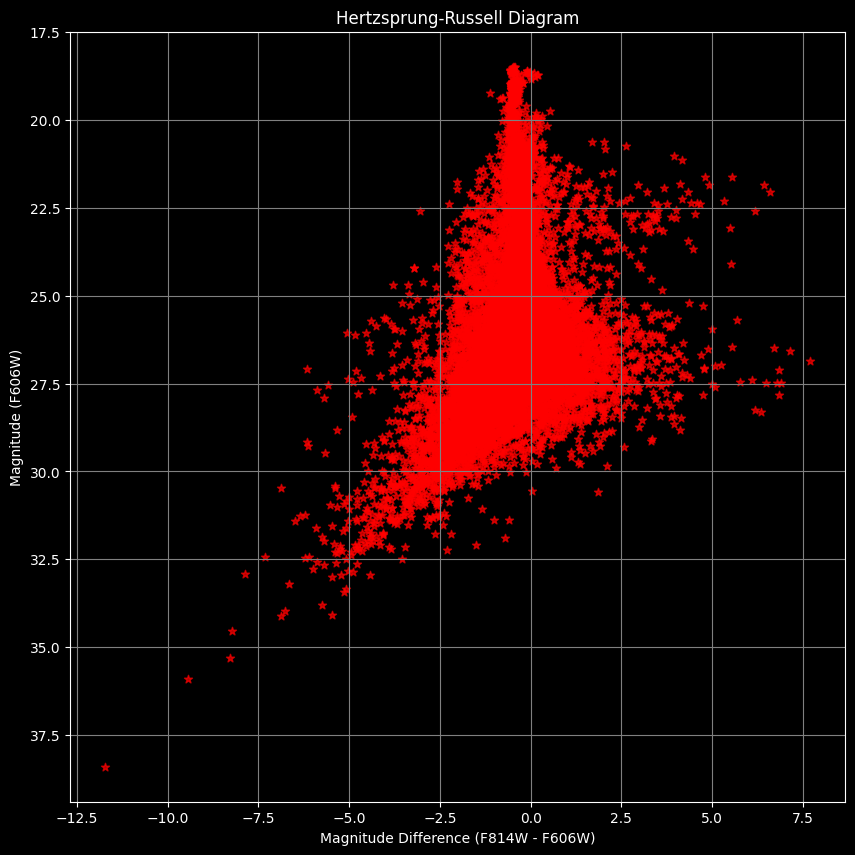

In [13]:
import matplotlib.pyplot as plt

# Prepare data for the HR diagram
magnitudes_f606w = matched_f606w['magnitude']  # Magnitude from matched_f606w
magnitude_difference = matched_f814w['magnitude_difference']  # Difference from matched_f814w

# Create a figure and axis with dark background
plt.style.use('dark_background')  # Set the style to dark background
plt.figure(figsize=(10, 10))

# Scatter plot with a different marker (e.g., 'D' for diamond)
plt.scatter(magnitude_difference, magnitudes_f606w, color='red', marker='*', alpha=0.7)

# Set labels and title
plt.xlabel('Magnitude Difference (F814W - F606W)', color='white')
plt.ylabel('Magnitude (F606W)', color='white')
plt.title('Hertzsprung-Russell Diagram', color='white')

# Invert the y-axis for magnitudes (so lower values are at the top)
plt.gca().invert_yaxis()

# Set axis limits if necessary
#plt.xlim(min(magnitude_difference) - 1, max(magnitude_difference) + 1)
#plt.ylim(min(magnitudes_f606w) - 1, max(magnitudes_f606w) + 1)

# Add grid for better readability
plt.grid(color='gray')

# Show the plot
plt.show()
